In [35]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

In [19]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [20]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [21]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [22]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [23]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [24]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [25]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [26]:
#i cant write df.class because class is a python's key word
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [27]:
df.duration.min()

0.83

In [28]:
df.duration.max()

49.83

In [29]:
df.duration.median()

11.25

we are going to drop Unnamed and flight  , one hot encode airline source_city	departure_time arrival_time	destination_city , stops into numerical values and class into binary since we have ust 2 classes , and leave the rest as they are because they are allready numerical.

PREPROCCESING

In [36]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('flight',axis=1)

df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0 )

In [38]:
df.stops = pd.factorize(df.stops)[0]

In [39]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


now one hot encoding

In [44]:
df = df.join(pd.get_dummies(df.airline,prefix = 'airline')).drop('airline',axis=1)

In [46]:
df = df.join(pd.get_dummies(df.source_city,prefix = 'source')).drop('source_city',axis=1)

In [47]:
df = df.join(pd.get_dummies(df.destination_city,prefix = 'dest')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.departure_time,prefix = 'departure')).drop('departure_time',axis=1)
df = df.join(pd.get_dummies(df.arrival_time,prefix = 'arrival')).drop('arrival_time',axis=1)

In [48]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,1,1,10.00,49,81585,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


TRAINING THE MODEL


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [52]:
X , y = df.drop('price',axis=1) , df['price']

In [53]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
300149,1,1,10.42,49,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
300150,1,1,13.83,49,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
300151,1,1,10.00,49,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [54]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [56]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

The score method compares the predicted values from the model to the actual values and returns an 𝑅2 score, which indicates how well the model's predictions match the true values.

An 𝑅2 score of 1.0 means perfect predictions.
An 𝑅2 score of 0.0 means the model performs no better than predicting the mean of the target values.
Negative values indicate that the model is performing worse than simply predicting the mean.

In [57]:
reg.score(X_test,y_test)

0.9849212590854574

In [58]:
import math
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [59]:
y_pred = reg.predict(X_test)

In [67]:
print(f'R2 score :                  {r2_score(y_test,y_pred)}')
print(f'mean absolute error :       {mean_absolute_error(y_test,y_pred)}')
print(f'mean squared error :        {mean_squared_error(y_test,y_pred)}')
print(f'root mean squared error :   {math.sqrt(mean_squared_error(y_test,y_pred))}')


R2 score :                  0.9849212590854574
mean absolute error :       1079.313973929409
mean squared error :        7765713.519829042
root mean squared error :   2786.7029837837117


Text(0.5, 1.0, 'Prediction vs Actual price')

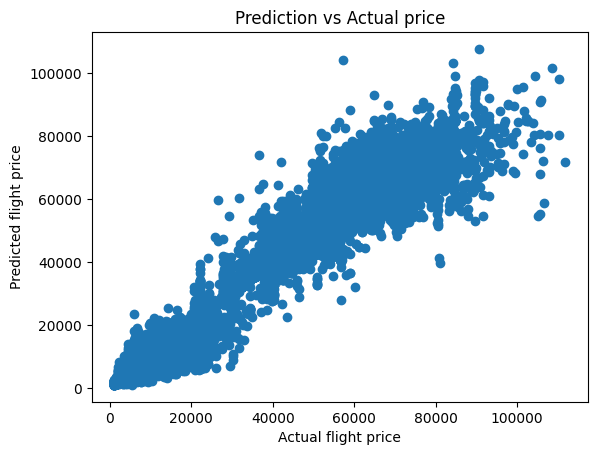

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual flight price')
plt.ylabel('Predicted flight price')
plt.title('Prediction vs Actual price')


In [64]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

the most important features

In [68]:
importances = dict(zip(reg.feature_names_in_ , reg.feature_importances_))
sorted_importances = sorted( importances.items() , key = lambda x: x[1] , reverse = True)

In [69]:
sorted_importances

[('class', 0.8804899855005565),
 ('duration', 0.057259971906327416),
 ('days_left', 0.01844794169898428),
 ('airline_Vistara', 0.005283631084168158),
 ('airline_Air_India', 0.00458966675806993),
 ('source_Delhi', 0.0037245949025089937),
 ('dest_Delhi', 0.003389026881066888),
 ('source_Mumbai', 0.0022247379529476146),
 ('dest_Mumbai', 0.0019269341549290292),
 ('stops', 0.0018178349979845229),
 ('dest_Kolkata', 0.001760399333906907),
 ('source_Kolkata', 0.0016924192452472087),
 ('dest_Hyderabad', 0.001547574715190845),
 ('arrival_Evening', 0.0014825783928904665),
 ('source_Hyderabad', 0.0012956460340912753),
 ('dest_Bangalore', 0.0012427145436568917),
 ('arrival_Night', 0.0011501667090222398),
 ('departure_Evening', 0.001111124760121537),
 ('source_Bangalore', 0.0010956895186027824),
 ('arrival_Afternoon', 0.0010016551584184899),
 ('departure_Morning', 0.000926837109012755),
 ('source_Chennai', 0.000865585744324124),
 ('dest_Chennai', 0.0008454123095436545),
 ('departure_Early_Morning', 

Text(0, 0.5, 'importance')

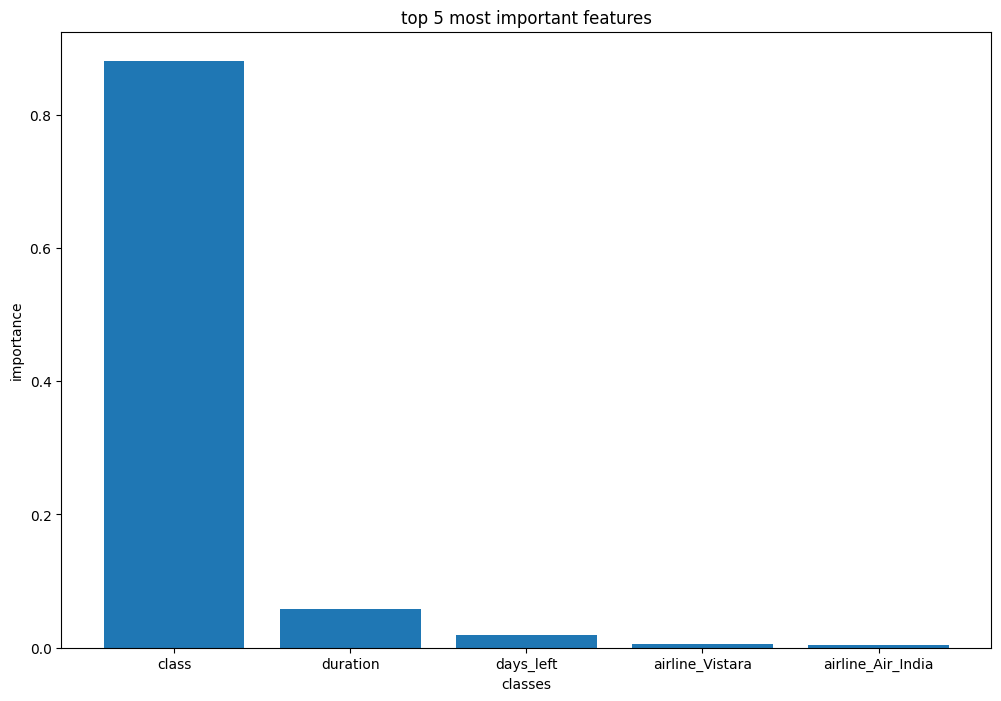

In [73]:
plt.figure(figsize=(12,8))
plt.bar([x[0] for x in sorted_importances[:5] ],[ x[1] for x in sorted_importances[:5]])
plt.title('top 5 most important features')
plt.xlabel('classes')
plt.ylabel('importance')


HyperParameter FineTuning

this will take some time because there is 216 different values combinations 

In [ ]:
# from sklearn.model_selection import GridSearchCV

# reg = RandomForestRegressor(n_jobs=-1)
# param_grid = {
#     'n_estimators' : [100,200,300],
#     'max_depth' : [None,10,20,30],
#     'min_samples_split': [2,5,10],
#     'min_samples_leaf': [1,2,4],
#     'max_features': ['auto','sqrt']

# }

# grid_search = GridSearchCV(reg,param_grid , cv=5)
# grid_search.fit(X_train,y_train)

# best_params = grid_search.best_params_



instead do this it requires much less time (it will not use all combinations but it will pick a value in the range provided and hopefully we can get the best estimators)

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]  
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=reg,
    param_distributions=param_dist,
    n_iter=2,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=10,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [77]:
best_regressor.score(X_test,y_test)

0.9841994833749977

In [78]:
y_pred = best_regressor.predict(X_test)
print(f'R2 score :                  {r2_score(y_test,y_pred)}')
print(f'mean absolute error :       {mean_absolute_error(y_test,y_pred)}')
print(f'mean squared error :        {mean_squared_error(y_test,y_pred)}')
print(f'root mean squared error :   {math.sqrt(mean_squared_error(y_test,y_pred))}')


R2 score :                  0.9841994833749977
mean absolute error :       1346.6247725593623
mean squared error :        8137435.762738234
root mean squared error :   2852.619105793522
